### Let's begin 

Importing the essential libraries for the task.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

Importing the data from the given url: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [2]:
link_to_data = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
raw_data = pd.read_csv(link_to_data)
print("Data Imported")

Data Imported


Checking the data.

In [3]:
raw_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the data

Understanding any preexisting relations in the data.

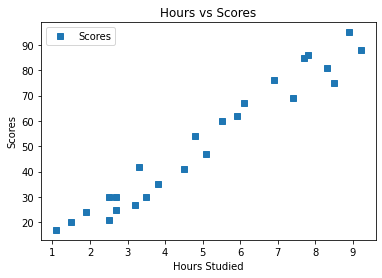

In [4]:
raw_data.plot(x='Hours', y='Scores', style='s')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores');  

In [5]:
raw_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


A strong positive linear relation is seen between Hours and Scores.

### Preparing the data

Splitting our data into numpy arrays to move forward.

In [6]:
X = raw_data.iloc[:,:-1].values
y = raw_data.iloc[:,1].values

Here, `X` is required to be a 2D array.

### Splitting the data

Importing the `train_test_split` method from the `sklearn.model_selection`

In [7]:
from sklearn.model_selection import train_test_split

Splitting our data into train and test datasets. We'll be training our model with 20% of the available data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=0)

Checking if everything is well according to our plan.

In [9]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7]])

### Algorithm

Finally importing `LinearRegression` from `sklearn.linear_model`

In [10]:
from sklearn.linear_model import LinearRegression

Making an object named `reg` to move forward.

In [11]:
reg = LinearRegression()

### Training our model

Training our model with the training data using the `fit` attribute.

In [12]:
reg.fit(X_train,y_train)

LinearRegression()

### Predicting using the trained model

Predicting on `X_test` data using our trained model.

In [13]:
y_predicted = reg.predict(X_test)

In [14]:
y_predicted

array([13.19611447, 30.43265949, 73.01706485, 23.3352586 , 57.80834865,
       36.51614597, 17.25177212, 77.0727225 , 67.94749278,  9.14045681,
       49.69703334, 76.05880809, 31.4465739 , 82.14229457, 91.26752428,
       59.83617747, 33.47440273, 25.36308742, 53.752691  , 25.36308742])

### Comparing

Comparing the actual and the predicted scores.

In [15]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df_compare

,Actual,Predicted
0,20,13.196114
1,27,30.432659
2,69,73.017065
3,30,23.335259
4,62,57.808349
5,35,36.516146
6,24,17.251772
7,86,77.072722
8,76,67.947493
9,17,9.140457


### Predicting for new data

Predicting the score for some new data.

In [16]:
hours = [[9.25]] #as input must a 2D array always
predicted_score = reg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25
Predicted Score = 91.77448149120502


### Evaluating the model

Finally we'll be evaluating the model, so that we can compare it with other models.

We have chosen the mean square error metric for evaluation here, there are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted)) 

Mean Absolute Error: 5.335035442373328
